In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy.optimize import curve_fit

In [30]:
def linear_f(x, a, b):
    return a * x + b

def num_col(data):
    move = 0
    while data[move].isdigit() == False:
        move+=1
    return move

In [64]:
def DataFromFile(file_name, mode = 1):
    
    #0 - minimize,1 - plavl
    
    df = pd.read_csv(file_name)
    print(df['Volume'].head())
    if mode == 1:
        return df['Step'], df['Temp'], df['TotEng'], df['PotEng'], df['Press'], df['Volume'], df['Enthalpy']
    return df['Step'], df['Temp'], df['TotEng'], df['PotEng'], df['Press'], df['Volume'], df['KinEng'],
    
def showData(x, y, x_name, y_name, title = None, start = 1, value = None):
    if value == None:
        value = np.mean(y[-20:])
    plt.figure(figsize=(8, 4))
    plt.grid()
    plt.plot(x[start:], y[start:], lw = 2, color = 'red', label = 'MD')
    if title == None:
        plt.title(y_name.split(",")[0])
    else:
        plt.title(title)
    plt.xlabel(x_name)
    plt.ylabel(y_name)

    plt.axhline(y = value*1.05, color = 'black', lw = 1, ls = '--')
    plt.axhline(y = value, color = 'black', lw = 1, label='average value')
    plt.axhline(y = value*0.95, color = 'black', lw = 1, ls = '--')

    plt.legend()
    plt.show()

In [65]:
N = 972 

In [66]:
file_name = 'minimize.lmp.csv'
step, temp, E_total, E_p, pressure, volume, E_k = DataFromFile(file_name, 0)
E_p = np.array(E_p) / N
E_total = np.array(E_total) / N
E_k = np.array(E_k) / N

0    9156.0359
1    9156.0359
2    9195.6927
3    9215.6120
4    9235.5906
Name: Volume, dtype: float64


In [70]:
sz = 900

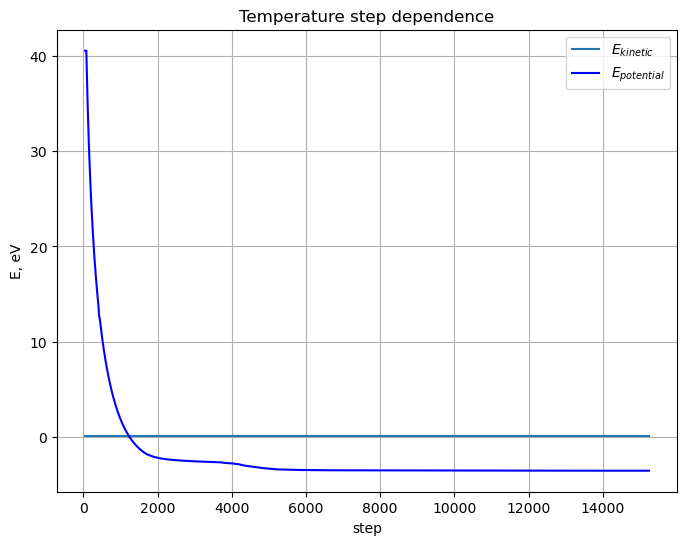

In [71]:
plt.figure(figsize=(8, 6))
plt.grid()
#parameters, covariance = curve_fit(linear_f, step, E_total)
plt.plot(step[:sz], E_k[:sz], label = '$E_{kinetic}$', zorder=9)
plt.plot(step[:sz], E_p[:sz], c = 'blue', label = '$E_{potential}$', zorder=10)
#plt.plot(step, parameters[0] * np.array(step) + parameters[1], lw = 2, color = 'black', label = 'linear approximation', zorder=10)
plt.xlabel('step')
plt.ylabel('E, eV')
plt.title("Temperature step dependence")
plt.legend()
plt.show();

In [ ]:
file_name = 'plavl.lmp.csv'
step, temp, E_total, E_p, pressure, volume, enthalpy = DataFromFile(file_name)
df = pd.read_csv(file_name)
volume = df['Volume']
E_total = np.array(E_total) / N
E_p = np.array(E_p) / N

In [ ]:
plt.figure(figsize=(8, 6))
plt.grid()
rho = 63.546 * 1e-3 * N / 6 / 1e23 / volume * 1e30
#parameters, covariance = curve_fit(linear_f, step, E_total)
plt.plot(step[:sz], rho[:sz], zorder=9)
#plt.plot(step, parameters[0] * np.array(step) + parameters[1], lw = 2, color = 'black', label = 'linear approximation', zorder=10)
plt.xlabel('step')
plt.ylabel(r'$ \rho $, г/мл')
plt.title(r"Сходимость плотности, $ \rho = $" + str(np.round(8996.014104, 3)))
plt.show();

In [ ]:
rho

In [ ]:
plt.figure(figsize=(8, 6))
plt.grid()
parameters, covariance = curve_fit(linear_f, step, temp)
plt.scatter(step, temp, s = 10, color = 'green', label = 'values', zorder=10)
plt.plot(step, parameters[0] * np.array(step) + parameters[1], lw = 2, color = 'black', label = 'linear approximation', zorder=10)
plt.xlabel('step')
plt.ylabel('T, K')
plt.title("Temperature step dependence")
plt.legend()
plt.show();

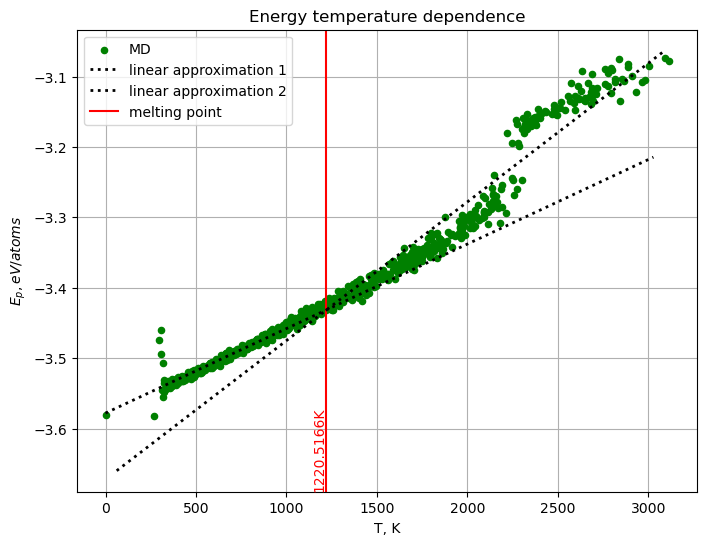

In [56]:
half = len(step)//3
temp_interp = np.linspace(temp.iloc[0], temp.iloc[-1], 10000) 
plt.figure(figsize=(8, 6))
plt.grid()
plt.scatter(temp, E_p, s = 20, color = 'green', label = 'MD', zorder=2)
parameters1, covariance1 = curve_fit(linear_f, temp[:half], E_p[:half])
parameters2, covariance2 = curve_fit(linear_f, temp[half+1:], E_p[half+1:])

plt.plot(temp_interp[:-200], parameters1[0] * np.array(temp_interp[:-200]) + parameters1[1], lw = 2, ls = ':', color = 'black', label = 'linear approximation 1', zorder=3)
plt.plot(temp_interp[200:], parameters2[0] * np.array(temp_interp[200:]) + parameters2[1], lw = 2, ls = ':', color = 'black', label = 'linear approximation 2', zorder=3)
ind_crit = np.where(np.abs(parameters1[0] * np.array(temp_interp[:-2]) + parameters1[1] - (parameters2[0] * np.array(temp_interp[2:]) + parameters2[1])) < 1e-5)[0][0]
plt.axvline(temp_interp[ind_crit], label = 'melting point', c = 'red')
plt.xlabel('T, K')
plt.ylabel(r'$E_p, eV/atoms$')
plt.title("Energy temperature dependence")
plt.text(temp_interp[ind_crit], plt.ylim()[0], f'{np.around(temp_interp[ind_crit],4)}K', rotation=90,
         verticalalignment='bottom', horizontalalignment='right', color='red')
plt.legend()
plt.show()

In [57]:
ind_crit

3949

In [58]:
parameters1[0] * temp_interp[ind_crit] + parameters1[1]

-3.4315843277081695

In [59]:
rdf586 = pd.read_csv('586K.txt',  index_col=False, skiprows = 1, delimiter = ' ').drop(columns='g(r)').rename(columns={"#" : "r", "Pair separation distance": "g(r)"})
rdf844 = pd.read_csv('844K.txt',  index_col=False, skiprows = 1, delimiter = ' ').drop(columns='g(r)').rename(columns={"#" : "r", "Pair separation distance": "g(r)"})
rdf1108 = pd.read_csv('1108K.txt',  index_col=False, skiprows = 1, delimiter = ' ').drop(columns='g(r)').rename(columns={"#" : "r", "Pair separation distance": "g(r)"})
rdf3000 = pd.read_csv('rdf3000K.txt',  index_col=False, skiprows = 1, delimiter = ' ').drop(columns='g(r)').rename(columns={"#" : "r", "Pair separation distance": "g(r)"})

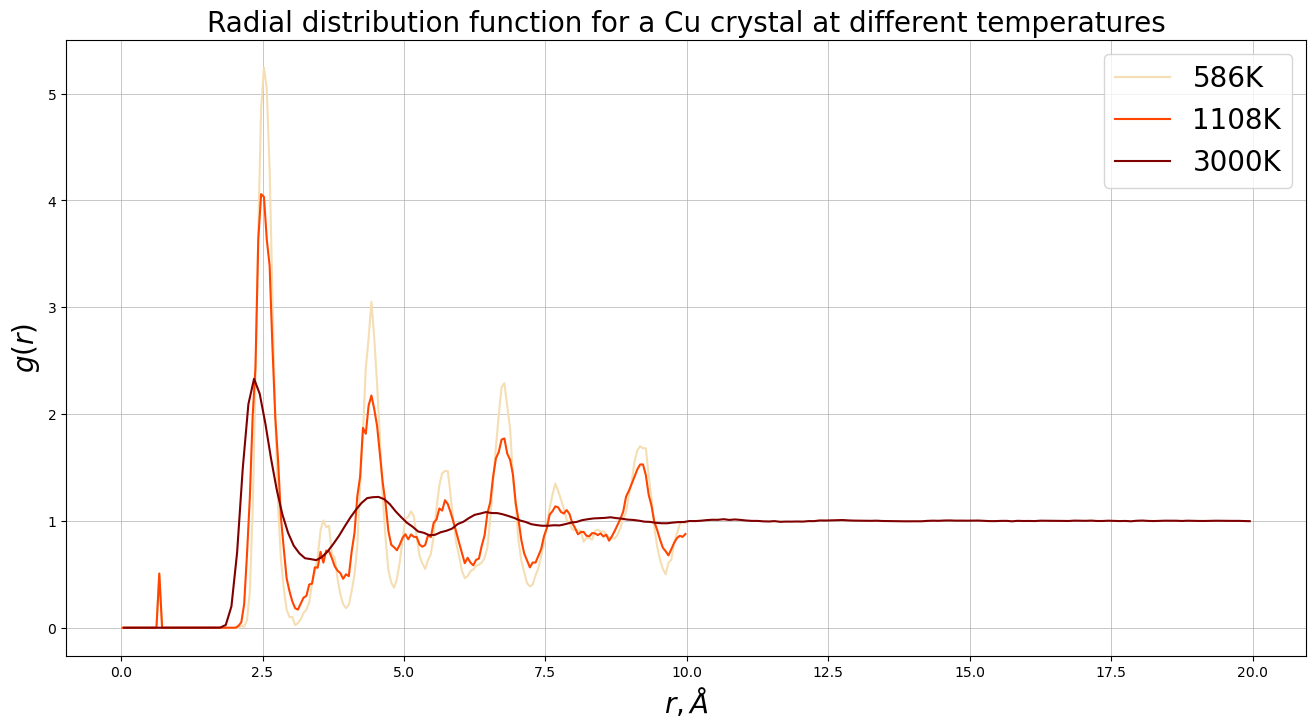

In [60]:
plt.figure(111, figsize=(16, 8))
SMALL_SIZE = 16
MEDIUM_SIZE = 20
BIGGER_SIZE = 30


plt.plot(rdf586['r'], rdf586['g(r)'], label = '586K', color = 'wheat')
plt.plot(rdf1108['r'], rdf1108['g(r)'], label = '1108K', color = 'orangered')
plt.plot(rdf3000['r'], rdf3000['g(r)'], label = '3000K', color = 'maroon')
plt.title('Radial distribution function for a Cu crystal at different temperatures', size = MEDIUM_SIZE)
plt.legend(loc=1, prop={'size': MEDIUM_SIZE})
plt.grid(lw=0.5)
plt.xlabel('$r, \u212B$', size = MEDIUM_SIZE)
plt.ylabel('$g(r)$', size = MEDIUM_SIZE);